# Project 01: Amazon Project.
    
#### Submitted By Mr. Vivek Gautam in October 2020

Building user-based recommendation model for Amazon.
DESCRIPTION

The dataset provided contains movie reviews given by Amazon customers. Reviews were given between May 1996 and July 2014.

Data Dictionary UserID – 4848 customers who provided a rating for each movie Movie 1 to Movie 206 – 206 movies for which ratings are provided by 4848 distinct users

Data Considerations

All the users have not watched all the movies and therefore, all movies are not rated. These missing values are represented by NA.
Ratings are on a scale of -1 to 10 where -1 is the least rating and 10 is the best.
Analysis Task

- Exploratory Data Analysis:

1- Which movies have maximum views/ratings?
2-What is the average rating for each movie? Define the top 5 movies with the maximum ratings.
3-Define the top 5 movies with the least audience.

- Recommendation Model: Some of the movies hadn’t been watched and therefore, are not rated by the users. Netflix would like to take this as an opportunity and build a machine learning recommendation algorithm which provides the ratings for each of the users.
Divide the data into training and test data,
Build a recommendation model on training data,

## Make predictions on the test data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
amazon=pd.read_csv(r'D:\Data_Science_Data\Amazon_Movies and TV Ratings.csv')
amazon

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,A1IMQ9WMFYKWH5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4844,A1KLIKPUF5E88I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4845,A5HG6WFZLO10D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4846,A3UU690TWXCG1X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [7]:
amazon.keys()

Index(['user_id', 'Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5', 'Movie6',
       'Movie7', 'Movie8', 'Movie9',
       ...
       'Movie197', 'Movie198', 'Movie199', 'Movie200', 'Movie201', 'Movie202',
       'Movie203', 'Movie204', 'Movie205', 'Movie206'],
      dtype='object', length=207)

# summarize on amazon data

In [9]:
amazon.shape

(4848, 207)

In [10]:
amazon.isnull().sum()

user_id        0
Movie1      4847
Movie2      4847
Movie3      4847
Movie4      4846
            ... 
Movie202    4842
Movie203    4847
Movie204    4840
Movie205    4813
Movie206    4835
Length: 207, dtype: int64

In [11]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Columns: 207 entries, user_id to Movie206
dtypes: float64(206), object(1)
memory usage: 7.7+ MB


In [12]:
amazon.describe()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
count,1.0,1.0,1.0,2.0,29.000000,1.0,1.0,1.0,1.0,1.0,...,5.000000,2.0,1.0,8.000000,3.000000,6.000000,1.0,8.000000,35.000000,13.000000
mean,5.0,5.0,2.0,5.0,4.103448,4.0,5.0,5.0,5.0,5.0,...,3.800000,5.0,5.0,4.625000,4.333333,4.333333,3.0,4.375000,4.628571,4.923077
std,NaN,NaN,NaN,0.0,1.496301,NaN,NaN,NaN,NaN,NaN,...,1.643168,0.0,NaN,0.517549,1.154701,1.632993,NaN,1.407886,0.910259,0.277350
min,5.0,5.0,2.0,5.0,1.000000,4.0,5.0,5.0,5.0,5.0,...,1.000000,5.0,5.0,4.000000,3.000000,1.000000,3.0,1.000000,1.000000,4.000000
25%,5.0,5.0,2.0,5.0,4.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,4.000000,4.000000,5.000000,3.0,4.750000,5.000000,5.000000
50%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
75%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
max,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000


In [13]:
amazon.describe().T

,count,mean,std,min,25%,50%,75%,max
Movie1,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie2,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie3,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Movie4,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
Movie5,29.0,4.103448,1.496301,1.0,4.00,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Movie202,6.0,4.333333,1.632993,1.0,5.00,5.0,5.0,5.0
Movie203,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Movie204,8.0,4.375000,1.407886,1.0,4.75,5.0,5.0,5.0
Movie205,35.0,4.628571,0.910259,1.0,5.00,5.0,5.0,5.0


# quest 1:find out movies having maximum numbers of rating

In [14]:
amazon_count=amazon.describe()[:1].T
amazon_count

,count
Movie1,1.0
Movie2,1.0
Movie3,1.0
Movie4,2.0
Movie5,29.0
...,...
Movie202,6.0
Movie203,1.0
Movie204,8.0
Movie205,35.0


In [15]:
amazon_count.sort_values('count',ascending=False).head()

,count
Movie127,2313.0
Movie140,578.0
Movie16,320.0
Movie103,272.0
Movie29,243.0


In [16]:
top5_movies=amazon_count.sort_values('count',ascending=False)[:5]
top5_movies

,count
Movie127,2313.0
Movie140,578.0
Movie16,320.0
Movie103,272.0
Movie29,243.0


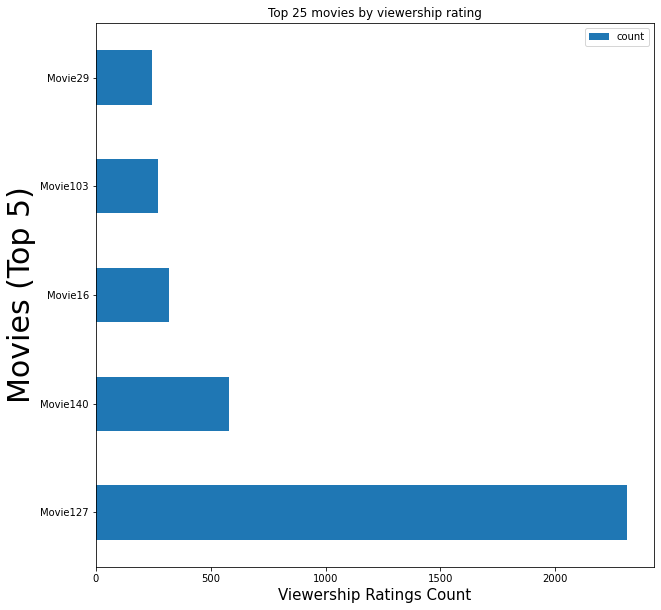

In [17]:
top5_movies.plot(kind='barh',alpha=1,figsize=(10,10))
plt.xlabel("Viewership Ratings Count",size=15)
plt.ylabel("Movies (Top 5)",size=30)
plt.title("Top 25 movies by viewership rating")
plt.show()

# quest2: find out the average rating of all the movies

In [18]:
amazon_mean=amazon.describe()[1:2].T

In [19]:
amazon_mean

,mean
Movie1,5.000000
Movie2,5.000000
Movie3,2.000000
Movie4,5.000000
Movie5,4.103448
...,...
Movie202,4.333333
Movie203,3.000000
Movie204,4.375000
Movie205,4.628571


# quest 2.1: top 5 movies with the maximum rating

In [20]:
amazon_mean.sort_values('mean',ascending=False).head()

,mean
Movie1,5.0
Movie66,5.0
Movie76,5.0
Movie75,5.0
Movie74,5.0


# quest3: top 5 movies with the least audience.

In [21]:
amazon_count.sort_values('count',ascending=True)[:5]

,count
Movie1,1.0
Movie71,1.0
Movie145,1.0
Movie69,1.0
Movie68,1.0


In [22]:
top5_least_audience=amazon_count.sort_values('count',ascending=True)[:5]

In [23]:
top5_least_audience

,count
Movie1,1.0
Movie71,1.0
Movie145,1.0
Movie69,1.0
Movie68,1.0


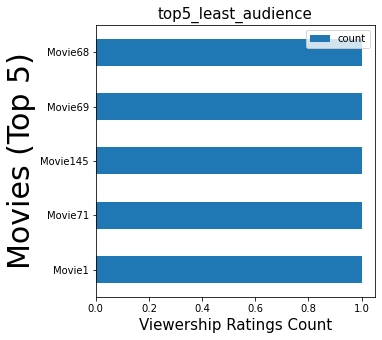

In [24]:
top5_least_audience.plot(kind='barh',alpha=1,figsize=(5,5))
plt.xlabel("Viewership Ratings Count",size=15)
plt.ylabel("Movies (Top 5)",size=30)
plt.title("top5_least_audience",size=15)
plt.show()

In [26]:
amazon_df=amazon.set_index('user_id').fillna(0)
amazon_df

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
user_id,,,,,,,,,,,,,,,,,,,,,
A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVIY68KEPQ5ZD,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1IMQ9WMFYKWH5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
A1KLIKPUF5E88I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
A5HG6WFZLO10D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


# lets find out the user user correlation

In [28]:
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise_distances

#Pairwise distance only accept Matrix object


user_corr = 1 - pairwise_distances( amazon_df, metric="correlation" )


ratings_matrix = pd.DataFrame( user_corr )
ratings_matrix

,0,1,2,3,4,5,6,7,8,9,...,4838,4839,4840,4841,4842,4843,4844,4845,4846,4847
0,1.000000,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,...,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915
1,-0.006915,1.000000,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878
2,-0.006915,-0.004878,1.000000,1.000000,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878
3,-0.006915,-0.004878,1.000000,1.000000,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878
4,-0.006915,-0.004878,-0.004878,-0.004878,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,-0.006915,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4844,-0.006915,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4845,-0.006915,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4846,-0.006915,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
ratings_matrix.index=amazon.user_id.unique()
ratings_matrix.columns=amazon.user_id.unique()

In [31]:
ratings_matrix

,A3R5OBKS7OM2IR,AH3QC2PC1VTGP,A3LKP6WPMP9UKX,AVIY68KEPQ5ZD,A1CV1WROP5KTTW,AP57WZ2X4G0AA,A3NMBJ2LCRCATT,A5Y15SAOMX6XA,A3P671HJ32TCSF,A3VCKTRD24BG7K,...,A31KDG42LDKA68,A1ZW2GF8QLTG62,A15W9FRLBUXJNS,AQ4JA4RFC5QHI,A1HY5DOJCVB8MG,A1IMQ9WMFYKWH5,A1KLIKPUF5E88I,A5HG6WFZLO10D,A3UU690TWXCG1X,AI4J762YI6S06
A3R5OBKS7OM2IR,0.000000,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,...,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915
AH3QC2PC1VTGP,-0.006915,0.000000,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878
A3LKP6WPMP9UKX,-0.006915,-0.004878,0.000000,1.000000,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878
AVIY68KEPQ5ZD,-0.006915,-0.004878,1.000000,0.000000,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878
A1CV1WROP5KTTW,-0.006915,-0.004878,-0.004878,-0.004878,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1IMQ9WMFYKWH5,-0.006915,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
A1KLIKPUF5E88I,-0.006915,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
A5HG6WFZLO10D,-0.006915,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
A3UU690TWXCG1X,-0.006915,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000


In [32]:
np.fill_diagonal(user_corr,0)

In [33]:
ratings_matrix

,A3R5OBKS7OM2IR,AH3QC2PC1VTGP,A3LKP6WPMP9UKX,AVIY68KEPQ5ZD,A1CV1WROP5KTTW,AP57WZ2X4G0AA,A3NMBJ2LCRCATT,A5Y15SAOMX6XA,A3P671HJ32TCSF,A3VCKTRD24BG7K,...,A31KDG42LDKA68,A1ZW2GF8QLTG62,A15W9FRLBUXJNS,AQ4JA4RFC5QHI,A1HY5DOJCVB8MG,A1IMQ9WMFYKWH5,A1KLIKPUF5E88I,A5HG6WFZLO10D,A3UU690TWXCG1X,AI4J762YI6S06
A3R5OBKS7OM2IR,0.000000,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,...,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915,-0.006915
AH3QC2PC1VTGP,-0.006915,0.000000,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878
A3LKP6WPMP9UKX,-0.006915,-0.004878,0.000000,1.000000,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878
AVIY68KEPQ5ZD,-0.006915,-0.004878,1.000000,0.000000,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878
A1CV1WROP5KTTW,-0.006915,-0.004878,-0.004878,-0.004878,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1IMQ9WMFYKWH5,-0.006915,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
A1KLIKPUF5E88I,-0.006915,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
A5HG6WFZLO10D,-0.006915,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
A3UU690TWXCG1X,-0.006915,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,-0.004878,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000


# lets find out the corelation between movies
### Let's choose two movies: movie2 and movie4¶
### Now lets grab the user ratings for those two movies:

In [35]:
Movie2_user_ratings = amazon_df['Movie2']
Movie4_user_ratings = amazon_df['Movie4']
Movie2_user_ratings.head(20)

user_id
A3R5OBKS7OM2IR    5.0
AH3QC2PC1VTGP     0.0
A3LKP6WPMP9UKX    0.0
AVIY68KEPQ5ZD     0.0
A1CV1WROP5KTTW    0.0
AP57WZ2X4G0AA     0.0
A3NMBJ2LCRCATT    0.0
A5Y15SAOMX6XA     0.0
A3P671HJ32TCSF    0.0
A3VCKTRD24BG7K    0.0
ANF0AGIV0JCH2     0.0
A3LDEBLV6MVUBE    0.0
A1R2XZWQ6NM5M1    0.0
A36L1XGA5AQIJY    0.0
A2HWI21H23GDS4    0.0
A1DNYFL3RSXRMO    0.0
A39VF226GBM1JH    0.0
ASB0E2O2FLNA7     0.0
A19E15Y9V09CVJ    0.0
A3K979KQ7K0S5K    0.0
Name: Movie2, dtype: float64

In [36]:
Movie4_user_ratings.head()

user_id
A3R5OBKS7OM2IR    0.0
AH3QC2PC1VTGP     0.0
A3LKP6WPMP9UKX    5.0
AVIY68KEPQ5ZD     5.0
A1CV1WROP5KTTW    0.0
Name: Movie4, dtype: float64

In [37]:
similar_to_Movie2 = amazon_df.corrwith(Movie2_user_ratings)
similar_to_Movie4 = amazon_df.corrwith(Movie4_user_ratings)

# this is the correlation for movie2

In [38]:
print('the reference movie title based on which recommendations are to be made:' )
corr_Movie2 = pd.DataFrame(similar_to_Movie2,columns=['correlation with movie4'])
corr_Movie2.dropna(inplace=True)
corr_Movie2.head(20)

the reference movie title based on which recommendations are to be made:


,correlation with movie4
Movie1,1.000000
Movie2,1.000000
Movie3,-0.000206
Movie4,-0.000292
Movie5,-0.001049
Movie6,-0.000206
Movie7,-0.000206
Movie8,-0.000206
Movie9,-0.000206
Movie10,-0.000206


# this is the correlation for movie4

In [41]:
print('the reference movie title based on which recommendations are to be made:' )
corr_Movie4 = pd.DataFrame(similar_to_Movie4,columns=['correlation with movie4'])
corr_Movie4.dropna(inplace=True)
corr_Movie4.head(20)

the reference movie title based on which recommendations are to be made:


,correlation with movie4
Movie1,-0.000292
Movie2,-0.000292
Movie3,-0.000292
Movie4,1.000000
Movie5,-0.001483
Movie6,-0.000292
Movie7,-0.000292
Movie8,-0.000292
Movie9,-0.000292
Movie10,-0.000292


# **********************************************************End*****************************************************************